In [3]:
import requests
import json
from pprint import pprint
import pandas as pd
from config import client_id
from config import client_auth_key
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = "https://api.jobspikr.com/sandbox/v1/data"
search_string = {"query_string": {"default_field": "job_title",
                                  "query": "\"Data Scientist\"OR \"Data Engineer\""}}

stjson = json.dumps(search_string)

payload = { "client_id" : client_id,
           "client_auth_key" : client_auth_key,
           "search_query_string" : stjson }

req = requests.get(url, params=payload).json()


job_title=[]
category = []
company_name = []
inferred_city =[]
inferred_state=[]
inferred_country=[]
post_date=[]
job_description=[]
job_type=[]
job_board=[]
uniq_id = []



keys = ["job_title","category","company_name",
        "inferred_city","inferred_state","inferred_country",
        "post_date","job_description","job_type","job_board","uniq_id"]

def append_key_if_present(json, key):
    try:
        key_data = req["job_data"][job][key]
        if key_data == "[]" or key_data == None:
           key_data = "#N/A"
    except KeyError:
        key_data = "#N/A"
    return key_data


Total_jobs = len(req["job_data"])

for job in range(Total_jobs):
    for key in keys:
        key_data = append_key_if_present(job,key)
        if key == keys[0]:
            job_title.append(key_data)
        elif key == keys[1]:
            category.append(key_data)
        elif key == keys[2]:
            company_name.append(key_data)  
        elif key == keys[3]:
            inferred_city.append(key_data)
        elif key == keys[4]:
            inferred_state.append(key_data)
        elif key == keys[5]:
            inferred_country.append(key_data)
        elif key == keys[6]:
            post_date.append(key_data)
        elif key == keys[7]:
            job_description.append(key_data)
        elif key == keys[8]:
            job_type.append(key_data)
        elif key == keys[9]:
            job_board.append(key_data)
        elif key == keys[10]:
            uniq_id.append(key_data)
      
   

In [5]:
jobs_df = pd.DataFrame({"job_title":job_title,
                        "category" :category,
                        "company_name" :company_name,
                        "inferred_city" :inferred_city,
                        'inferred_state' : inferred_state,
                        'inferred_country' : inferred_country,
                        'post_date' :post_date,
                        'job_description':job_description,
                        "job_type":job_type,
                        "job_board" : job_board,
                        "uniq_id" :uniq_id
                        })
jobs_df.to_csv("JobsPikr_API_outputjobs.csv",index = False)
jobs_df.count()

job_title           100
category            100
company_name        100
inferred_city       100
inferred_state      100
inferred_country    100
post_date           100
job_description     100
job_type            100
job_board           100
uniq_id             100
dtype: int64

In [6]:
jobs_df_us = jobs_df.loc[jobs_df["inferred_country"] == "United states"]
jobs_df_us.count()

job_title           31
category            31
company_name        31
inferred_city       31
inferred_state      31
inferred_country    31
post_date           31
job_description     31
job_type            31
job_board           31
uniq_id             31
dtype: int64

In [7]:
Kaggle_data = "../Resource/data_scientist_united_states_job_postings_jobspikr.csv"
Kaggle_data = pd.read_csv(Kaggle_data)

# Combine the data into a single dataset
combined_results_df = pd.merge(Kaggle_data,jobs_df_us,on="uniq_id",how= "outer")

combined_results_df.to_csv("combined_outputjobs.csv",index = False)
combined_results_df.head()   

,crawl_timestamp,url,job_title_x,category_x,company_name_x,city,state,country,inferred_city_x,inferred_state_x,...,job_title_y,category_y,company_name_y,inferred_city_y,inferred_state_y,inferred_country_y,post_date_y,job_description_y,job_type_y,job_board_y
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
combined_results_df["job_title_x"] = combined_results_df["job_title_x"].fillna(combined_results_df["job_title_y"])
combined_results_df["category_x"] = combined_results_df["category_x"].fillna(combined_results_df["category_y"])
combined_results_df["company_name_x"] = combined_results_df["company_name_x"].fillna(combined_results_df["company_name_y"])
combined_results_df["inferred_city_x"] = combined_results_df["inferred_city_x"].fillna(combined_results_df["inferred_city_y"])
combined_results_df["inferred_state_x"] = combined_results_df["inferred_state_x"].fillna(combined_results_df["inferred_state_y"])
combined_results_df["inferred_country_x"] = combined_results_df["inferred_country_x"].fillna(combined_results_df["inferred_country_y"])
combined_results_df["post_date_x"] = combined_results_df["post_date_x"].fillna(combined_results_df["post_date_y"])
combined_results_df["job_description_x"] = combined_results_df["job_description_x"].fillna(combined_results_df["job_description_y"])
combined_results_df["job_type_x"] = combined_results_df["job_type_x"].fillna(combined_results_df["job_type_y"])
combined_results_df["job_board_x"] = combined_results_df["job_board_x"].fillna(combined_results_df["job_board_y"])



In [9]:

combined_results_df = combined_results_df[["job_title_x","category_x","company_name_x","inferred_city_x",
                                                   "inferred_state_x","inferred_country_x",
                                                   "post_date_x","job_type_x",
                                                   "job_board_x","uniq_id"]]

combined_results_df.rename(columns={"job_title_x": "job_title", "category_x": "category", 
                                    "company_name_x": "company_name",
                                    "inferred_city_x":"inferred_city",
                                    "inferred_state_x":"inferred_state",
                                    "inferred_country_x":"inferred_country",
                                    "post_date_x":"post_date",
                                    "job_type_x":"job_type",
                                    "job_board_x":"job_board"}, inplace = True)

combined_results_df.head()

,job_title,category,company_name,inferred_city,inferred_state,inferred_country,post_date,job_type,job_board,uniq_id
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland hills,California,Usa,2019-02-06,Undefined,indeed,3b6c6acfcba6135a31c83bd7ea493b18
1,Data Scientist,NaN,Luxoft USA Inc,Middletown,New jersey,Usa,2019-02-05,Undefined,dice,741727428839ae7ada852eebef29b0fe
2,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New york,New york,Usa,2019-02-05,Full Time,dice,cdc9ef9a1de327ccdc19cc0d07dbbb37
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New york,New york,Usa,2019-02-06,Undefined,indeed,1c8541cd2c2c924f9391c7d3f526f64e
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,North carolina,Usa,2019-02-05,Full Time,monster,445652a560a5441060857853cf267470


In [10]:
combined_results_df["job_title"].value_counts()

Data Scientist                             2890
Senior Data Scientist                       644
Sr. Data Scientist                          203
Lead Data Scientist                         179
Principal Data Scientist                    148
                                           ... 
Sr Data Scientist in Alpharetta, GA           1
TS/SCI Data Scientist                         1
Senior Data Scientist- Houston, TX            1
Data Scientist 4 in Chantilly, VA             1
Senior Data Scientist in Woodbridge, NJ       1
Name: job_title, Length: 2764, dtype: int64

In [12]:
#_axis= np.arange(len(combines_results_df["company_name"])
combined_results_df["job_board"].value_counts()




indeed           4960
careerbuilder    2036
monster          1868
dice              448
Stackoverflow       7
totaljob            2
simplyhired         2
Name: job_board, dtype: int64

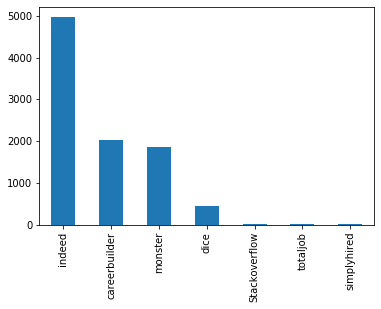

In [17]:

combined_results_df["job_board"].value_counts().plot(kind='bar')

In [ ]:
###### This set of code needs to be finalized on the "combined_results_df" DataFrame and for all different job titles.

combined_results_df["job_title"] = combined_results_df["job_title"].fillna("unknown")

combined_results_df["Job_title_final"] = ''

for index,row in combined_results_df.iterrows():
    if "Data Scientist" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Scientist"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Scientist"
        elif "Principal" in x:
            row["Job_title_final"] = "Principal Data Scientist"
        elif "Junior" in x:
            row["Job_title_final"] = "Junior Data Scientist"
        else:
            row["Job_title_final"] = "Data Scientist"
    elif "Data Engineer" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Engineer"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Engineer"
        elif "Junior" in x:
            row["Job_title_final"] = "Junior Data Engineer"
        else:
            row["Job_title_final"] = "Data Engineer"
    elif "Data Analyst" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Analyst"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Analyst"
        else:
            row["Job_title_final"] = "Data Analyst"
    else:
            row["Job_title_final"] = "Unknown"
            
print(combined_results_df["Job_title_final"].value_counts())

In [ ]:
combined_results_df = combined_results_df[~combined_results_df.Job_title_final.str.contains("Unknown")]
print(combined_results_df["Job_title_final"].value_counts())

In [18]:
Job_results_grouped_by_state = combined_results_df.groupby(["inferred_state"])["uniq_id"].count()

Job_results_sorted = Job_results_grouped_by_state.sort_values(ascending= False)

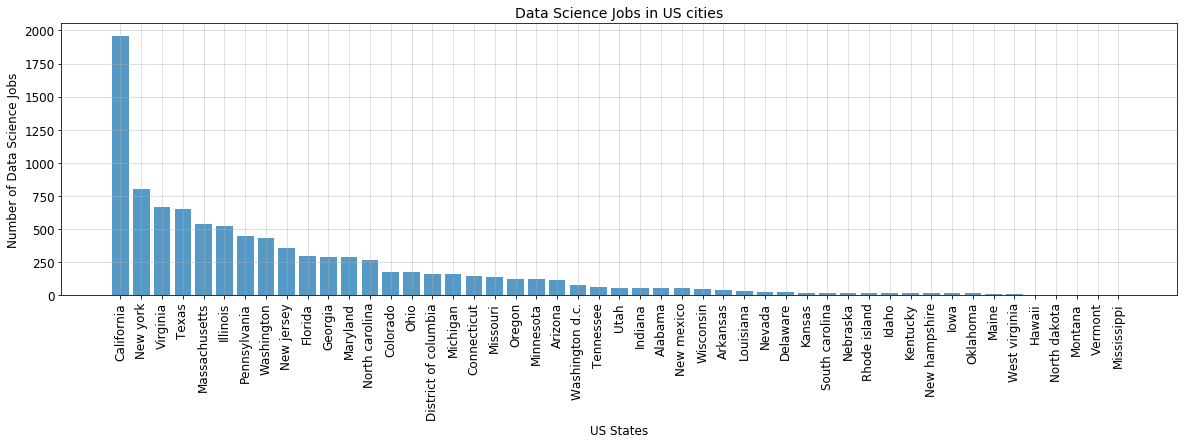

In [19]:
plt.figure(figsize=(20,5))

Plot_Data = plt.bar(Job_results_sorted.index,Job_results_sorted,alpha=0.75)

plt.xticks(rotation="90",fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('US States',fontsize = 12)
plt.ylabel("Number of Data Science Jobs",fontsize = 12)
plt.title("Data Science Jobs in US cities",fontsize = 14)
plt.grid(alpha = 0.5)
plt.savefig('Data Science Jobs in US cities - Desc order.png')

plt.show()


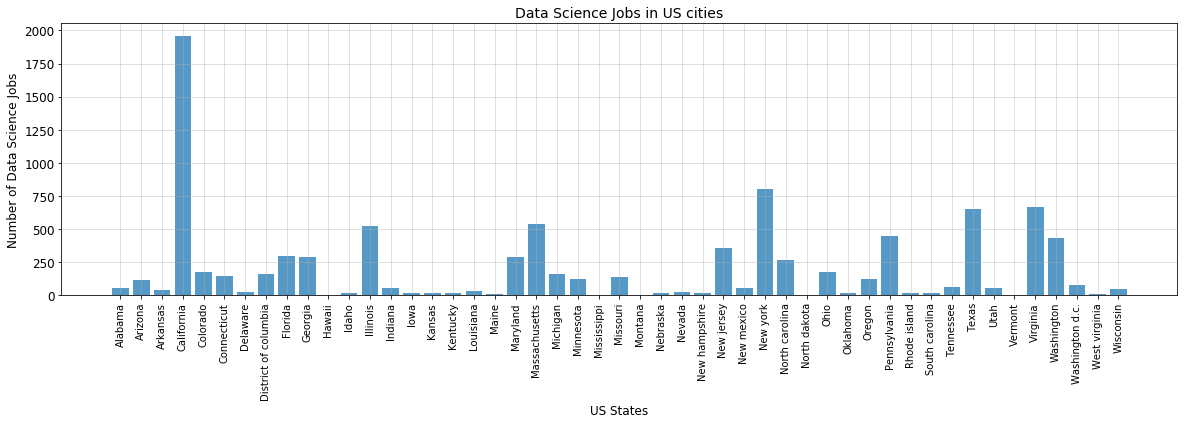

In [22]:
plt.figure(figsize=(20,5))

Plot_Data = plt.bar(Job_results_grouped_by_state.index,Job_results_grouped_by_state,alpha=0.75)

plt.xticks(rotation="90",fontsize = 10)
plt.yticks(fontsize = 12)

plt.xlabel('US States',fontsize = 12)
plt.ylabel("Number of Data Science Jobs",fontsize = 12)
plt.title("Data Science Jobs in US cities",fontsize = 14)

plt.grid(alpha = 0.5)

plt.savefig('Data Science Jobs in US cities.png')
plt.show()

In [23]:
cities_list = combined_results_df["inferred_city"].unique()
len(cities_list)

684

In [ ]:
# from WeatherConfig import weather_api_key
# import time 

# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# unit = "Imperial"

# query_url = base_url + "appid=" + weather_api_key + "&q=" + "Dallas" + "&units=" + unit


# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# pprint(weather_json)
# # print(weather_json["coord"]["lat"])
# # print(weather_json["coord"]["lon"])



In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Imperial"

lat = []
lng = []
city = []

record = 0

for city in cities_list:  
    try: 
        
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
       
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        city.append(city)
       
                
        record= record + 1
        if record == 50:
            record = 0
                      
            time.sleep(90)
        
    except:
        continue

print(len(lat))
print(len(lng))
print(len(city))

NameError: name 'cities_list' is not defined

In [21]:
cities_df = pd.DataFrame({"city":city,
                        "lat":lat,
                        "lng":lng})

cities_df

,city,lat,lng
